In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("https://raw.githubusercontent.com/erinhay/jolteon/refs/heads/main/notebooks/stylesheet/style.mplstyle")

In [2]:
# !ls /global/cfs/cdirs/desc-td/ELASTICC2/ELASTICC2_FINAL_Cepheid/

In [3]:
# !ls /global/cfs/cdirs/desc-td/ELASTICC2_parquet

In [4]:
# !ls /global/cfs/cdirs/desc-td/ELASTICC2_TRAIN02_parquet

In [5]:
letter_to_num = {"u": 0, "g": 1, "r": 2, "i": 3, "z": 4, "y": 5}
num_to_letter = {val: key for key, val in letter_to_num.items()}

# Peak wavelength for passband in Armstrong
lsst_wavelengths = {
    "u": 3670.69,
    "g": 4826.85,
    "r": 6223.24,
    "i": 7545.98,
    "z": 8590.90,
    "y": 9710.28,
}

In [6]:
df = pd.read_parquet("/global/cfs/cdirs/desc-td/ELASTICC2_parquet/Cepheid.parquet")
# dftrain = pd.read_parquet("/global/cfs/cdirs/desc-td/ELASTICC2_TRAIN02_parquet/Cepheid.parquet")

---

In [7]:
chosen_df = df[df["SNID"]==67934121].iloc[0]

In [8]:
cols = ["MJD", "FLUXCAL", "FLUXCALERR", "BAND"]
dat = []
for col in cols:
    dat.append(chosen_df.loc[col])
dat = np.array(dat).T
lc = pd.DataFrame(data=dat,columns=cols).sort_values(by="MJD")

In [9]:
lc["FLUXCAL"]

34      4.807534
35      2.390611
174   -20.821272
36     -1.387617
175    -6.536362
         ...    
119     1.760175
33     57.063568
120     6.844023
172    -2.752472
173     1.398899
Name: FLUXCAL, Length: 214, dtype: object

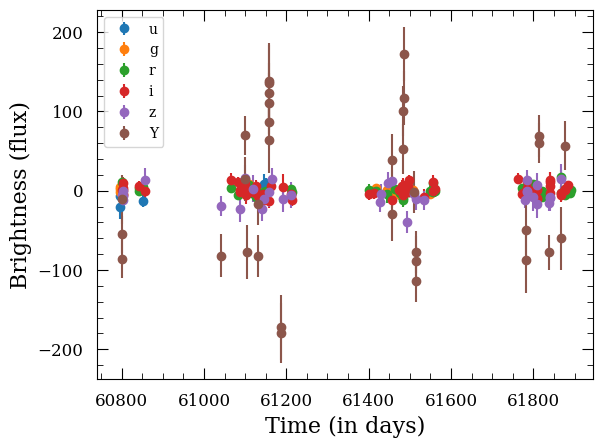

In [10]:
for band in "ugrizY":
    lc_band = lc[lc["BAND"] == band]
    plt.errorbar(
        x=lc_band["MJD"],
        y=lc_band["FLUXCAL"],
        yerr=lc_band["FLUXCALERR"],
        fmt="o",
        label=f"{band}",
    )
plt.xlabel("Time (in days)")
plt.ylabel("Brightness (flux)")
plt.legend()
# plt.title(f"OID {objid} ({cur_cl})")
# plt.xlim(peak_mjd - 40, peak_mjd + 90)
# plt.grid()
# plt.savefig("rawlc_crop.pdf", bbox_inches="tight")
plt.show()


### Alerce feat extract

In [11]:
# !pip install Cython
# !pip install -e git+https://git@github.com/alercebroker/turbo-fats#egg=turbofats
# !pip install -e git+https://git@github.com/alercebroker/mhps#egg=mhps
# !pip install -e git+https://git@github.com/alercebroker/P4J#egg=P4J
# !pip install pyarrow
# !pip install -e git+https://git@github.com/alercebroker/lc_classifier#egg=lc_classifier

In [12]:
import sys
sys.path.append('src/turbofats')
sys.path.append('src/mhps')
sys.path.append('src/p4j')
sys.path.append('src/lc-classifier')

In [13]:
import numpy as np
import pandas as pd

In [14]:
from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor
from lc_classifier.features import FeatureExtractorComposer

In [15]:
# df = pd.read_csv("Quaternary2000.csv.gz", index_col=0)

In [16]:
lc["magnitude"] = 27.5 - 2.5*np.log10(lc["FLUXCAL"].to_numpy().astype("float64"))

/tmp/ipykernel_462935/4243513056.py:1: RuntimeWarning: invalid value encountered in log10
  lc["magnitude"] = 27.5 - 2.5*np.log10(lc["FLUXCAL"].to_numpy().astype("float64"))


In [53]:
plt.scatter(lc["mjd"], lc["magnitude"])

KeyError: 'mjd'

In [19]:
# bands = df["band"].unique()
# bands

In [20]:
colnames = ['time', 'magnitude', 'error', 'band']
# oid	time			magnitude	error		band
# 108	58271.475660	15.728958	0.012513	g
# 108	58274.452986	15.609181	0.012337	g
# 108	58277.446759	15.550803	0.012260	g
# 108	58280.447870	15.574180	0.012290	g
# 108	58283.447500	15.557415	0.012269	g

In [21]:
for c in chosen_df.index:
    print(c)

SNID
MJD
BAND
PHOTFLAG
PHOTPROB
FLUXCAL
FLUXCALERR
PSF_SIG1
SKY_SIG
RDNOISE
ZEROPT
ZEROPT_ERR
GAIN
SIM_MAGOBS
RA
DEC
SNTYPE
NOBS
PTROBS_MIN
PTROBS_MAX
MWEBV
MWEBV_ERR
REDSHIFT_HELIO
REDSHIFT_HELIO_ERR
REDSHIFT_FINAL
REDSHIFT_FINAL_ERR
VPEC
VPEC_ERR
HOSTGAL_NMATCH
HOSTGAL_NMATCH2
HOSTGAL_OBJID
HOSTGAL_FLAG
HOSTGAL_PHOTOZ
HOSTGAL_PHOTOZ_ERR
HOSTGAL_SPECZ
HOSTGAL_SPECZ_ERR
HOSTGAL_RA
HOSTGAL_DEC
HOSTGAL_SNSEP
HOSTGAL_DDLR
HOSTGAL_CONFUSION
HOSTGAL_LOGMASS
HOSTGAL_LOGMASS_ERR
HOSTGAL_LOGSFR
HOSTGAL_LOGSFR_ERR
HOSTGAL_LOGsSFR
HOSTGAL_LOGsSFR_ERR
HOSTGAL_COLOR
HOSTGAL_COLOR_ERR
HOSTGAL_ELLIPTICITY
HOSTGAL_OBJID2
HOSTGAL_SQRADIUS
HOSTGAL_OBJID_UNIQUE
HOSTGAL_MAG_u
HOSTGAL_MAG_g
HOSTGAL_MAG_r
HOSTGAL_MAG_i
HOSTGAL_MAG_z
HOSTGAL_MAG_Y
HOSTGAL_MAGERR_u
HOSTGAL_MAGERR_g
HOSTGAL_MAGERR_r
HOSTGAL_MAGERR_i
HOSTGAL_MAGERR_z
HOSTGAL_MAGERR_Y
HOSTGAL2_OBJID
HOSTGAL2_FLAG
HOSTGAL2_PHOTOZ
HOSTGAL2_PHOTOZ_ERR
HOSTGAL2_SPECZ
HOSTGAL2_SPECZ_ERR
HOSTGAL2_RA
HOSTGAL2_DEC
HOSTGAL2_SNSEP
HOSTGAL2_DDLR
HOSTGAL2_

In [34]:
feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
            PeriodExtractor(
                bands=bands,
                smallest_period=0.045,
                largest_period=500.0,
                optimal_grid=True,
                trim_lightcurve_to_n_days=3000.0,
                min_length=10
            ),            
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
)

In [35]:
ind_grp = np.array_split(df.index.unique(), 1000)

In [37]:
len(ind_grp)

1000

In [ ]:
allfeatures = []
for i, inds in enumerate(tqdm(ind_grp)):
    features = feature_extractor.compute_features(df.loc[inds])
    # features.to_csv(f"featbatches/Quatnernary_{i+1}.csv")
    allfeatures.append(features)